Plot saved to /mnt/d/QM_E/week7/Images/actin_af2_af3_residue_distances.png
Significant difference in residues (distance > 0.2 nm): [ 1  2  3  4 38 39 40 41 42 43 44 45 62 63]


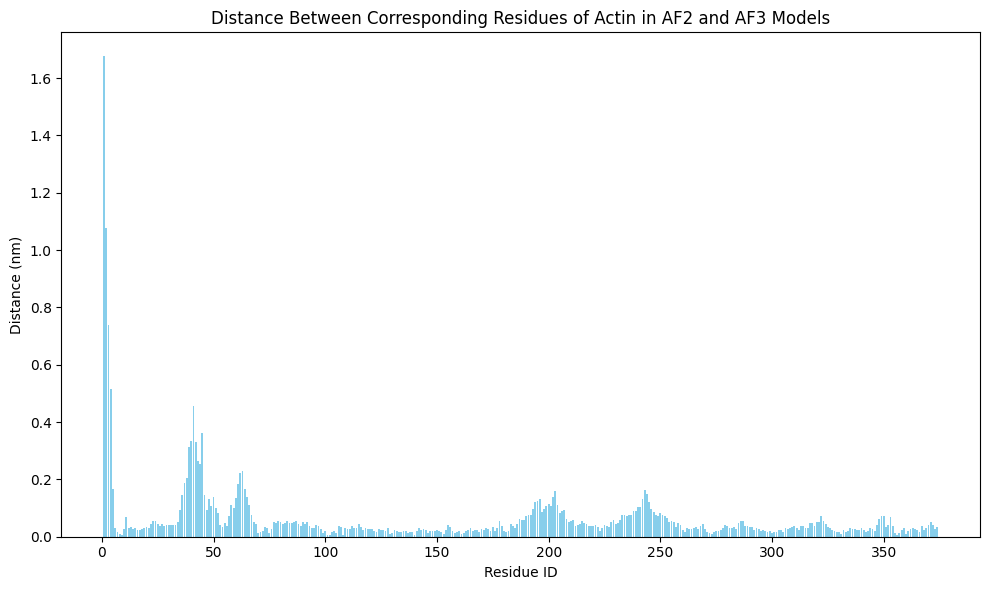

In [6]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# AF2 和 AF3 PDB 文件路径
af2_pdb_file = "/mnt/d/QM_E/week7/Inputs/2BTF/AF2/test_2444f/test_2444f_unrelaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb"
af3_pdb_file = "/mnt/d/QM_E/week7/Inputs/2BTF/AF3_fold_atp_2protin_mg/fold_atp_2protin_mg_model_0.pdb"  # 使用转换后的 PDB 文件

# 加载 AF2 和 AF3 预测的 Actin-Profilin 结构
af2_traj = md.load(af2_pdb_file)
af3_traj = md.load(af3_pdb_file)

# 选择链 A（假设 Actin 是链 A）
actin_chain_af2 = af2_traj.topology.select("chainid 0 and name CA")  # 链 A in AF2
actin_chain_af3 = af3_traj.topology.select("chainid 0 and name CA")  # 链 A in AF3

# 对齐 AF2 和 AF3 的 Actin 链（使用 AF2 作为参考）
af3_traj.superpose(af2_traj, atom_indices=actin_chain_af2, ref_atom_indices=actin_chain_af3)

# 计算 Actin 中相应残基的距离
distances = np.sqrt(np.sum((af2_traj.xyz[:, actin_chain_af2, :] - af3_traj.xyz[:, actin_chain_af3, :])**2, axis=2))

# 计算每个残基之间的平均距离
average_distances = np.mean(distances, axis=0)

# 创建条形图来显示残基之间的距离
residue_ids = np.arange(1, len(average_distances) + 1)
plt.figure(figsize=(10, 6))
plt.bar(residue_ids, average_distances, color='skyblue')
plt.xlabel('Residue ID')
plt.ylabel('Distance (nm)')
plt.title('Distance Between Corresponding Residues of Actin in AF2 and AF3 Models')
plt.tight_layout()

# 保存图像到指定路径
output_image_path = "/mnt/d/QM_E/week7/Images/actin_af2_af3_residue_distances.png"
plt.savefig(output_image_path, dpi=300)

# 打印输出图像保存路径
print(f"Plot saved to {output_image_path}")

# 查找具有显著差异的残基并分析是否为无序区域或靠近核苷酸
significant_threshold = 0.2  # 定义一个距离阈值来确定显著差异
significant_residues = residue_ids[average_distances > significant_threshold]

print(f"Significant difference in residues (distance > {significant_threshold} nm): {significant_residues}")
